# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should have a cluster column at the last.                                                                                      


## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1.

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [69]:
# Load dataset
def load_dataset():

    df = pd.read_excel("/salary_data.xlsx")
    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):

    # TODO: Convert categorical features to numeric using one-hot or label encoding

    processed_df=df.copy()
    categorical_cols=['Education', 'WorkType', 'Gender']

    processed_df = pd.get_dummies(processed_df, columns=categorical_cols, drop_first=True)

    numeric_features = processed_df.select_dtypes(include=['float64', 'int64']).columns

    for features in numeric_features:
        min_val = processed_df[features].min()
        max_val = processed_df[features].max()
        processed_df[features] = (processed_df[features] - min_val) / (max_val - min_val)

    return processed_df

In [60]:
def kmeans_scratch(X, k, max_iters=100):


  # Return:
  # - labels: 1D numpy array of cluster assignments
  # - centroids: final centroid coordinates

  if isinstance(X, pd.DataFrame):
    X = X.values

  X = X.astype(np.float64)
  num_samples, num_features = X.shape

  # Initialize centroids
  if np.isnan(X).any() or np.isinf(X).any():
    raise ValueError("Input array contains NaN or infinite values.")

  random_indices = np.random.choice(num_samples, size=k, replace=False)
  centroids = X[random_indices]

  labels = np.zeros(num_samples)
  distances=np.zeros((num_samples, k))

  for _ in range(max_iters):
    old_centroids = centroids.copy()

    for i in range(k):
        distances[:, i] = np.sqrt(np.sum((X - centroids[i]) ** 2, axis=1))

    labels = np.argmin(distances, axis=1)

    for i in range(k):
      cluster_points = X[labels == i]
      if len(cluster_points) > 0:
        centroids[i] = np.mean(cluster_points, axis=0)

    if np.all(centroids == old_centroids):
      break

  return labels, centroids



In [61]:
k = 4
max_iter = 200
df = load_dataset()
df_processed = preprocess_data(df)
label, centroids = kmeans_scratch(df_processed, k)
df['Cluster'] = label
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender    Salary  Cluster  
0    Male  60173.49        0  
1  Female  42965.45        1  
2    Male  54924.41        3  
3  Female  26734.99        3  
4    Male  15325.23        1  


## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [62]:
from sklearn.cluster import KMeans

In [63]:
df = load_dataset()
df_processed = preprocess_data(df)

# TODO:
# 1. Apply KMeans from sklearn using same k and maximum iterations
# 2. Get predicted labels

k = 4
max_iter = 200

kmeans = KMeans(n_clusters=k, max_iter=max_iter)
kmeans.fit(df_processed)
labels = kmeans.labels_


In [64]:
df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender    Salary  Cluster  
0    Male  60173.49        0  
1  Female  42965.45        3  
2    Male  54924.41        0  
3  Female  26734.99        3  
4    Male  15325.23        0  


## **Part 3:** (Visualize for both part 1 and part 2)
Visualize the clusters using PCA (2D)

In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [66]:
def visualize_clusters(X, labels, title):




# TODO:
# 1. Apply PCA to reduce features to 2 dimensions
# 2. Create a scatter plot (use Cluster as color)
# 3. Add axis labels and title

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

    return

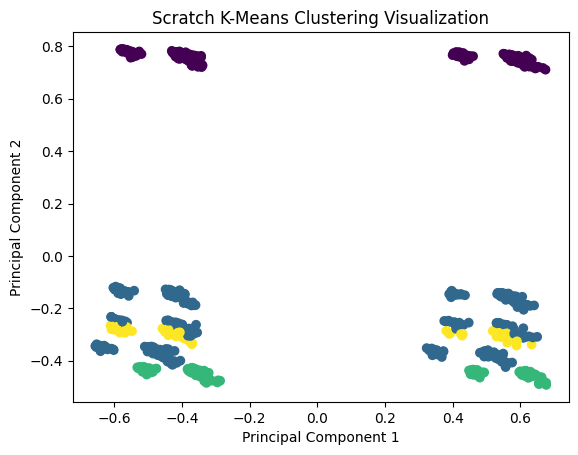

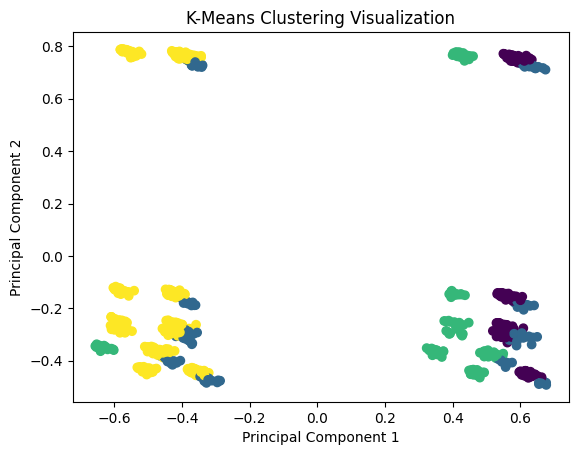

In [67]:
# Call this after scaling and predicting in Part 2
visualize_clusters(df_processed, label, "Scratch K-Means Clustering Visualization")
visualize_clusters(df_processed, labels, "K-Means Clustering Visualization")